## Ananyse Chicago Crime data 
### dataset : <a href = "https://github.com/sauravshah31/Machine_Learning/blob/master/dataset/assign2/Chicago_Crime_Detective.csv"> click_this </a>
### Questions : <a href  = "https://sauravshah31.github.io/Machine_Learning/assignment_week2.html"> click_this</a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
Crime = pd.read_csv('../../dataset/assign2/Chicago_Crime_Detective.csv',index_col='Unnamed: 0')
Crime.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [6]:
Crime.shape

(191641, 9)

In [7]:
Crime['Date'].isnull().values.any() #check if there is any null value

False

In [8]:
n = 191641
Crime['Date'].sort_values()[n//2] # to calculate the median, we need to sort the Date

'5/21/06 12:30'

In [9]:
month = [str(date).split(' ')[0].split('/')[0] for date in Crime['Date']] #extract the month

In [15]:
Crime['month']=month #add a new month Series based on above calculation

In [16]:
month_crime = Crime['month'].value_counts() #get the months and total no of crime committed in that month
month_crime

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: month, dtype: int64

In [17]:
print(month_crime.min()) 
month_crime.loc[month_crime==13511] #month with min no of crimes recorded

13511


2    13511
Name: month, dtype: int64

In [18]:
weekday = [pd.to_datetime(Crime['Date'][i]).weekday() for i in range(n)] #extract the weekday
Crime['weekday']=weekday #add the series to dataframe

In [19]:
week_day = Crime['weekday'].value_counts() #get total crimes corresponding to each month
week_day 

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: weekday, dtype: int64

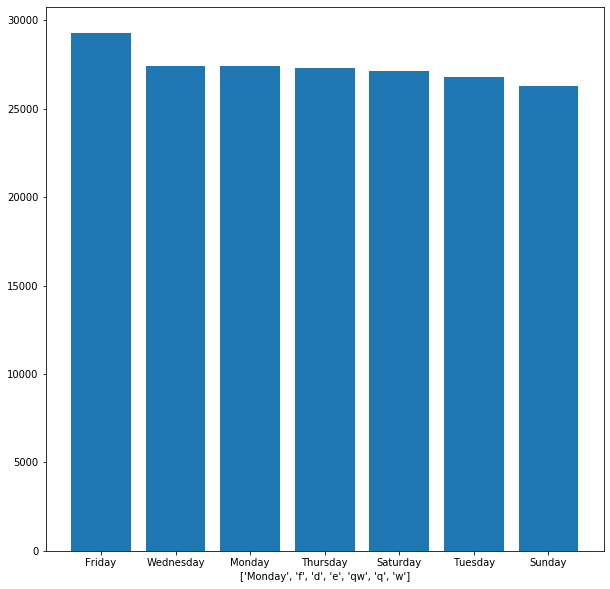

In [20]:
#weeks and no of crimes committed
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
x = [week[i] for i in week_day.index]
plt.figure(figsize=(10,10))
plt.bar(x,week_day.iloc[:])
plt.xlabel(['Monday','f','d','e','qw','q','w'])
plt.show()

In [21]:
print(Crime['Arrest'].isnull().values.any()) #check if any null value
Z = Crime.loc[Crime['Arrest']==True]['month'].value_counts() #get no of crimes recorded in each month for which arrest was made
print('month with Largest motor theft for which arrest was made: ',Z.loc[Z==Z.max()])

False
month with Largest motor theft for which arrest was made:  1    1435
Name: month, dtype: int64


False


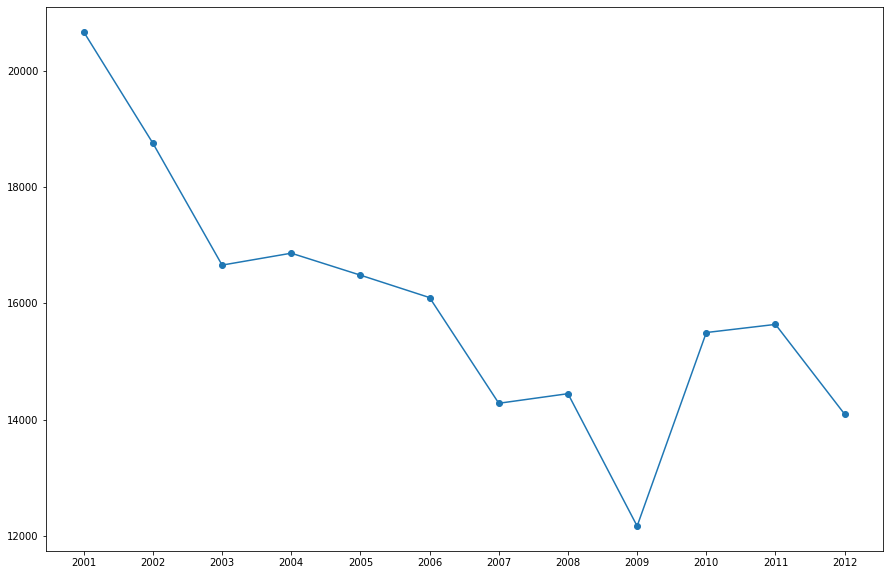

In [22]:
#total crime from 2001 tp 2012
Z = Crime['Year'].value_counts()
print(Z.isnull().values.any())
Z.sort_index(inplace=True)
plt.figure(figsize=(15,10))
plt.plot(Z.index,Z.loc[:],'o-')
plt.xticks(Z.index)
plt.show()

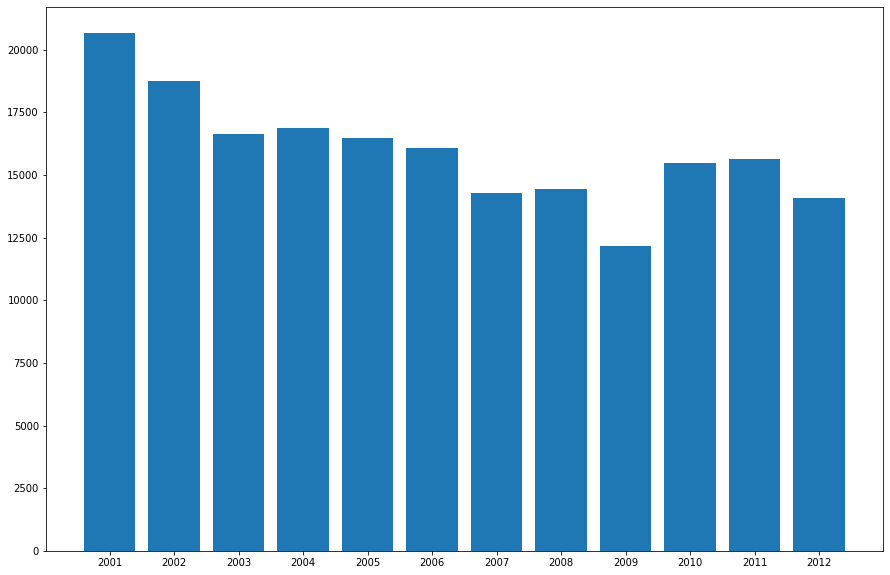

In [23]:
plt.figure(figsize=(15,10))
plt.bar(Z.index,Z.loc[:])
plt.xticks(Z.index)
plt.show()

In [26]:
Z1 = Crime.loc[Crime['Arrest']==True]['Year'].value_counts() #total crimes recorded in each year for which arrest was made
Z2 = Crime['Year'].value_counts()
Z1.sort_index() #total arrests
Z2.sort_index() #total crime

# %arrested = no_arrested/total_crime
first = np.sum(Z1.loc[:2001])/np.sum(Z2.loc[:2001])*100
second = np.sum(Z1.loc[2001:])/np.sum(Z2.loc[2001:])*100
#check wheteher % of arrest made is greater in first or second half
print("% arrested in first half ",first) 
print("% arrested in second half ",second )
#plt.plot(Z1.index,Z2.loc[:]/Z1.loc[:])
#plt.xticks([2001,2007,2012])
#plt.show()

% arrested in first half  10.411727708161981
% arrested in second half  8.106824740008662


In [27]:
Z1.loc[2001]/Z2.loc[2001] #ratio arrested in 2001

0.10411727708161982

In [28]:
Z1.loc[2007]/Z2.loc[2007] #ratio arrested in 2007

0.08487394957983194

In [29]:
Z = Crime['LocationDescription'].loc[Crime['LocationDescription']!='OTHER'].value_counts()
sorted = Z.sort_values(ascending=False).head(5) #get top five crime location


In [30]:
#create subset according to qn
filter = Crime['LocationDescription'].isin(sorted.index)
subset = Crime.loc[filter]
print(subset.shape) 
#or
print(np.sum(sorted[:]))

(177510, 11)
177510


In [31]:
Z = Crime.loc[Crime['LocationDescription']=='GAS STATION']['weekday'].value_counts()
week[Z.sort_values(ascending=False).index[0]] #weekday with max crime rate

'Saturday'